# 单变量线性回归
###(y=3.1234x+2.98)

## 1.准备数据

In [12]:
#生成人工数据集
#导入所需要的包
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(5)

In [13]:
x_data=np.linspace(0,100,500)
y_data=3.1234*x_data+2.98+np.random.randn(*x_data.shape)*10

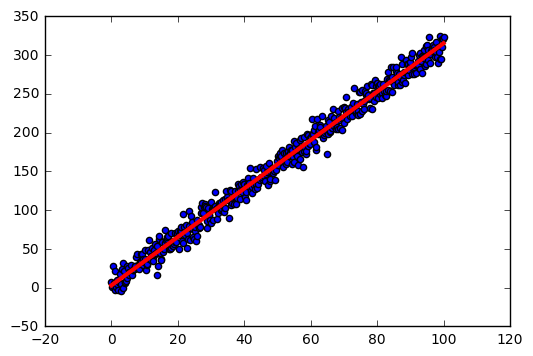

In [14]:
#画图
plt.scatter(x_data,y_data)
plt.plot(x_data,3.12334*x_data+2.98,color='red',linewidth=3)

# 2.构建模型

In [15]:
#定义训练数据
# x=tf.placeholder("float",name="x")
x=tf.placeholder(tf.float32,name="x")
y=tf.placeholder("float",name="y")
#定义模型
def model(x,w,b):
    return tf.multiply(x,w)+b
#变量初始化
w=tf.Variable(1.0,name="w0")
b=tf.Variable(0.0,name="b0")
#预测值
pred=model(x,w,b)

# 3.训练模型

In [16]:
train_epochs=10 #训练轮数
learning_rate=0.001 #学习率

In [17]:
#损失函数
loss_function=tf.reduce_mean(tf.square(y-pred))
# optimizer=tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)
optimizer=tf.train.AdamOptimizer(learning_rate).minimize(loss_function)

In [18]:

logdir='I:\YMipny\Tensorboard1\log'

In [19]:
#会话
sess=tf.Session()
init=tf.global_variables_initializer()


In [20]:
sess.run(init)

Train Epoch:01 step:020 loss=304.914978027
Train Epoch:01 step:040 loss=1219.427856445
Train Epoch:01 step:060 loss=816.404785156
Train Epoch:01 step:080 loss=1066.092895508
Train Epoch:01 step:100 loss=2260.959228516
Train Epoch:01 step:120 loss=2453.050292969
Train Epoch:01 step:140 loss=5070.578125000
Train Epoch:01 step:160 loss=4024.986328125
Train Epoch:01 step:180 loss=3740.512451172
Train Epoch:01 step:200 loss=6626.466796875
Train Epoch:01 step:220 loss=4903.392089844
Train Epoch:01 step:240 loss=5375.375976562
Train Epoch:01 step:260 loss=8242.749023438
Train Epoch:01 step:280 loss=7744.309082031
Train Epoch:01 step:300 loss=9049.991210938
Train Epoch:01 step:320 loss=9732.361328125
Train Epoch:01 step:340 loss=9949.443359375
Train Epoch:01 step:360 loss=11178.861328125
Train Epoch:01 step:380 loss=10950.228515625
Train Epoch:01 step:400 loss=16621.652343750
Train Epoch:01 step:420 loss=11715.661132812
Train Epoch:01 step:440 loss=14216.460937500
Train Epoch:01 step:460 loss=

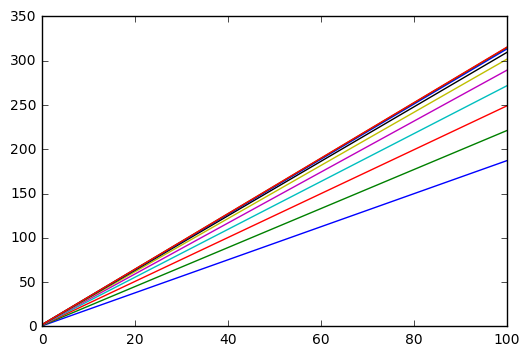

In [21]:
step=0
loss_list=[]
for epoch in range(train_epochs):
    for xs,ys in zip(x_data,y_data):
        _,loss=sess.run([optimizer,loss_function],feed_dict={x:xs,y:ys})
        loss_list.append(loss)
        step+=1
        if step%20==0:
            print("Train Epoch:%02d"%(epoch+1),"step:%03d"%(step),"loss=%.9f"%(loss))
    b0temp=b.eval(session=sess)#!!!
    #w0temp=w.eval(session=sess)
    w0temp=sess.run(w)
    plt.plot(x_data,w0temp*x_data+b0temp)

    

In [22]:
writer=tf.summary.FileWriter(logdir,sess.graph)
writer.close()

In [23]:
print("w=",sess.run(w))
print("b=",sess.run(b))

w= 3.13355
b= 2.16317


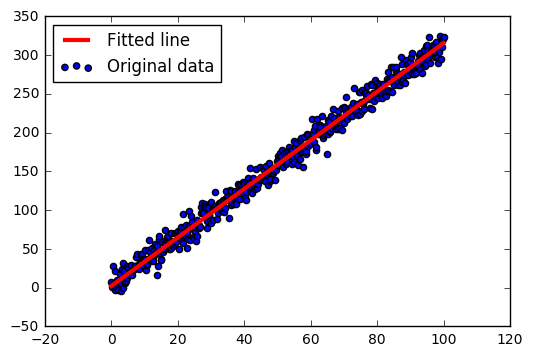

In [24]:
plt.scatter(x_data,y_data,label="Original data")
plt.plot(x_data,x_data*sess.run(w)+sess.run(b),label='Fitted line',color='r',linewidth=3)
plt.legend(loc=2)

In [25]:
x_test=5.79
predict=sess.run(pred,feed_dict={x:x_test})
print('预测值：%f'% predict)
target=3.1234*x_test+2.98
print('目标值：%f'% target)

预测值：20.306398
目标值：21.064486
